In [25]:
import os
import re
import pandas as pd
import numpy as np

import plotly
import plotly.plotly as py
from plotly.graph_objs import *

plotly.tools.set_credentials_file(username='theano', api_key='hkYRYxjyM0aAGA5nmGq1')

In [26]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

In [3]:
home = os.getcwd()
print(home)

/home/theano/mountpoint/tsch/mininetpipe


In [5]:
results_dir = os.path.join(home, "results")

In [7]:
tcp_tput_fname = os.path.join(results_dir, "throughput_TCP.txt")

In [30]:
def load_datfile(fpath):
    # Returns a dataframe
    df = pd.read_table(fpath)
    return df

In [81]:
df = load_datfile(tcp_tput_fname)

In [83]:
df = df.applymap(lambda x: list(map(int, x.split(","))))

In [140]:
df_lists = df[list(df.columns.values)].unstack().apply(pd.Series)

In [202]:
udp_tput_fname = os.path.join(results_dir, "throughput_UDP.txt")
df3 = load_datfile(udp_tput_fname)
df3.set_index(['ncli'])

,udp20
ncli,
1,"17463,17572,17467,17318,16931"
2,"29906,29721,29819,36214,35789"
4,"73793,73218,74431,73454,72505"
8,"140608,141055,141055,141055,141055"
16,"189789,194213,194213,194213,194213"
32,"260903,260903,260903,260903,260903"
64,"290660,290660,290660,290660,290660"
128,"307034,307034,307034,307034,307034"
256,"299024,299024,299024,299024,299024"


In [203]:
df3 = df3.applymap(lambda x: list(map(int, x.split(","))))

AttributeError: ("'int' object has no attribute 'split'", 'occurred at index ncli')

In [188]:
df3

,tput20+spin,tput20-spin
1,"[18558, 19082, 18871, 18999, 18992]","[14712, 14755, 14610, 14867, 14603]"
2,"[37824, 37657, 37064, 37058, 38678]","[27478, 27002, 26850, 26880, 27119]"
4,"[66396, 65043, 66665, 68838, 68572]","[49617, 50032, 51021, 48605, 49428]"
8,"[84380, 84243, 84594, 84141, 84300]","[93602, 91114, 96788, 83013, 83860]"
16,"[129822, 134030, 131798, 129577, 130878]","[101458, 121925, 101112, 100454, 101737]"
32,"[185354, 187715, 186313, 189191, 188496]","[168214, 171324, 164918, 174953, 173541]"
64,"[231423, 232386, 232680, 231721, 232423]","[229631, 230671, 230816, 228329, 229410]"
128,"[224435, 224239, 227767, 228333, 227664]","[226023, 226575, 225953, 227588, 226886]"
256,"[224571, 225476, 225133, 224123, 221891]","[224154, 224073, 223298, 223966, 223688]"
512,"[220980, 221307, 222249, 220135, 220788]","[219136, 220044, 221010, 219276, 218361]"


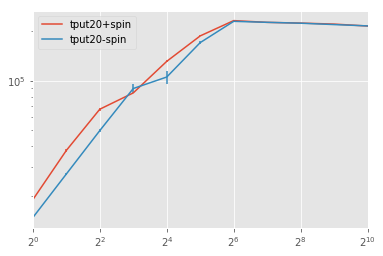

In [183]:
df1 = df["tput20+spin"].apply(pd.Series).T
df2 = df["tput20-spin"].apply(pd.Series).T
df3 = df3.apply(pd.Series).T

mean1 = df1.mean()
err1 = df1.std()

mean2 = df2.mean()
err2 = df2.std()

mean3 = df3.mean()
err2 = df3.std()

df_all = pd.DataFrame({"tput20+spin": mean1, "tput20-spin": mean2, "udp20": })

ax = df_all.plot(yerr=[err1,err2,err3])
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)

plt.show()